# Parameter Explorer Example

This notebook demonstrates how to use the `ParameterExplorer` class to analyze the sensitivity of water rocket performance to different parameters.

The `ParameterExplorer` allows you to:
- Explore how different rocket parameters affect performance metrics
- Perform sensitivity analysis
- Visualize parameter impacts
- Identify the most critical design parameters

## Setup and Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from waterrocketpy.visualization.parameter_explorer import ParameterExplorer
from waterrocketpy.rocket.builder import RocketBuilder, create_standard_rocket
from waterrocketpy.core.simulation import WaterRocketSimulator

## Create Base Rocket Configuration

First, let's create a standard rocket configuration that will serve as our baseline for parameter exploration.

In [2]:
# Create a standard rocket configuration
base_rocket = create_standard_rocket()

print("Base rocket created successfully!")
print(f"Empty mass: {base_rocket.empty_mass:.3f} kg")
print(f"Water fraction: {base_rocket.water_fraction:.3f}")
print(f"Nozzle diameter: {base_rocket.nozzle_diameter:.6f} m")

Base rocket created successfully!
Empty mass: 0.250 kg
Water fraction: 0.330
Nozzle diameter: 0.015000 m


## Initialize Parameter Explorer

Create an instance of the ParameterExplorer and extract the base parameters from our rocket.

In [3]:
# Initialize the parameter explorer
explorer = ParameterExplorer()

# Extract base parameters from the rocket
base_params = explorer.extract_base_parameters(base_rocket)

print("Base parameters extracted:")
for name, value in base_params.items():
    print(f"   {name}: {value}")

Debug - Available simulation parameters:
  P0: 810600
  A_nozzle: 0.00017671458676442585
  V_bottle: 0.002
  water_fraction: 0.33
  C_d: 0.97
  m_empty: 0.25
  C_drag: 0.5
  A_rocket: 0.007853981633974483
  liquid_gas_mass: 0.0

Debug - Extracted base parameters:
  initial_pressure: 810600
  pressure: 810600
  water_fraction: 0.33
  nozzle_area: 0.00017671458676442585
  nozzle_diameter: 0.00017671458676442585
  nozzle_discharge_coefficient: 0.97
  bottle_volume: 0.002
  empty_mass: 0.25
  drag_coefficient: 0.5
  reference_area: 0.007853981633974483
  rocket_diameter: 0.007853981633974483
  liquid_gas_mass: 0.0
Base parameters extracted:
   initial_pressure: 810600
   pressure: 810600
   water_fraction: 0.33
   nozzle_area: 0.00017671458676442585
   nozzle_diameter: 0.00017671458676442585
   nozzle_discharge_coefficient: 0.97
   bottle_volume: 0.002
   empty_mass: 0.25
   drag_coefficient: 0.5
   reference_area: 0.007853981633974483
   rocket_diameter: 0.007853981633974483
   liquid_gas

## Define Parameters to Explore

Select the key parameters that we want to analyze for their impact on rocket performance.

In [4]:
# Define the parameters we want to explore
parameters_to_explore = ["empty_mass", "water_fraction", "nozzle_diameter"]

print(f"Parameters to explore: {parameters_to_explore}")

Parameters to explore: ['empty_mass', 'water_fraction', 'nozzle_diameter']


## Run Parameter Exploration

Now we'll run the exploration to see how these parameters affect the rocket's apogee (maximum height).

In [5]:
# Create parameter configurations for exploration
parameter_configs = explorer.create_parameter_configs(base_params, parameters_to_explore)

# Run the exploration targeting apogee as our performance metric
results = explorer.explore_multiple_parameters(
    base_rocket,
    parameter_configs,
    target="apogee"
)

print(f"\nExploration completed! Generated {len(results)} result sets.")

Exploring 3 parameters: ['empty_mass', 'water_fraction', 'nozzle_diameter']
  Exploring pair: empty_mass vs water_fraction
    Progress: 10/100 (10.0%)
    Progress: 20/100 (20.0%)
    Progress: 30/100 (30.0%)
    Progress: 40/100 (40.0%)
    Progress: 50/100 (50.0%)
    Progress: 60/100 (60.0%)
    Progress: 70/100 (70.0%)
    Progress: 80/100 (80.0%)
    Progress: 90/100 (90.0%)
    Progress: 100/100 (100.0%)
  Exploring pair: empty_mass vs nozzle_diameter
    Progress: 10/100 (10.0%)
    Progress: 20/100 (20.0%)
    Progress: 30/100 (30.0%)
    Progress: 40/100 (40.0%)
    Progress: 50/100 (50.0%)
    Progress: 60/100 (60.0%)
    Progress: 70/100 (70.0%)
    Progress: 80/100 (80.0%)
    Progress: 90/100 (90.0%)
    Progress: 100/100 (100.0%)
  Exploring pair: water_fraction vs nozzle_diameter
    Progress: 10/100 (10.0%)
    Progress: 20/100 (20.0%)
    Progress: 30/100 (30.0%)
    Progress: 40/100 (40.0%)
    Progress: 50/100 (50.0%)
    Progress: 60/100 (60.0%)
    Progress: 70/10

## Analyze Results

Let's examine the first result set and perform sensitivity analysis.

In [ ]:
# Display basic information about the first result set
first_result = results[0]

# Print sensitivity analysis
print("\n=== Sensitivity Analysis ===")
explorer.print_sensitivity_analysis(results)


=== Sensitivity Analysis ===

SENSITIVITY ANALYSIS

Parameter Sensitivities (for Maximum Altitude):
--------------------------------------------------
nozzle_diameter     :     1.14e+03 m/unit
empty_mass          :     8.97e+01 m/unit
water_fraction      :     2.10e+00 m/unit

Relative Importance (normalized to most sensitive parameter):
--------------------------------------------------
nozzle_diameter     :  100.0%
empty_mass          :    7.9%
water_fraction      :    0.2%


## Visualize Results

Create plots to visualize how each parameter affects the rocket's performance.

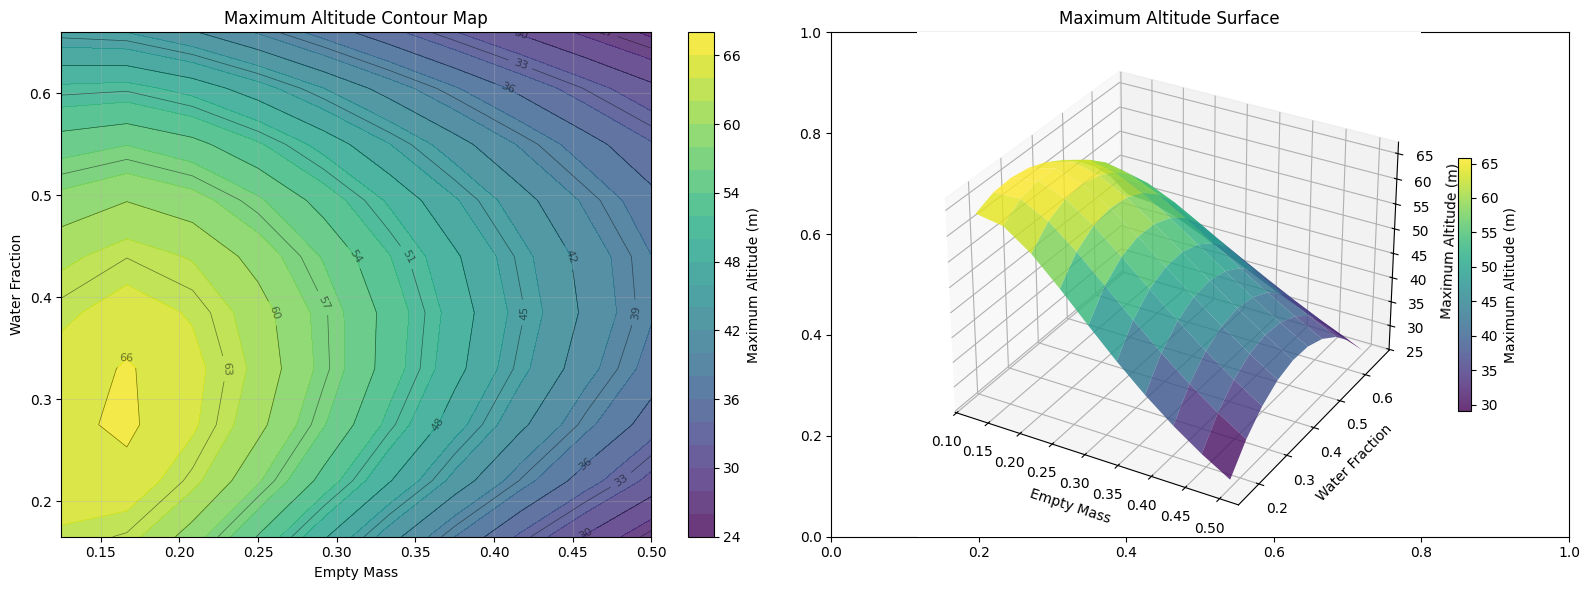

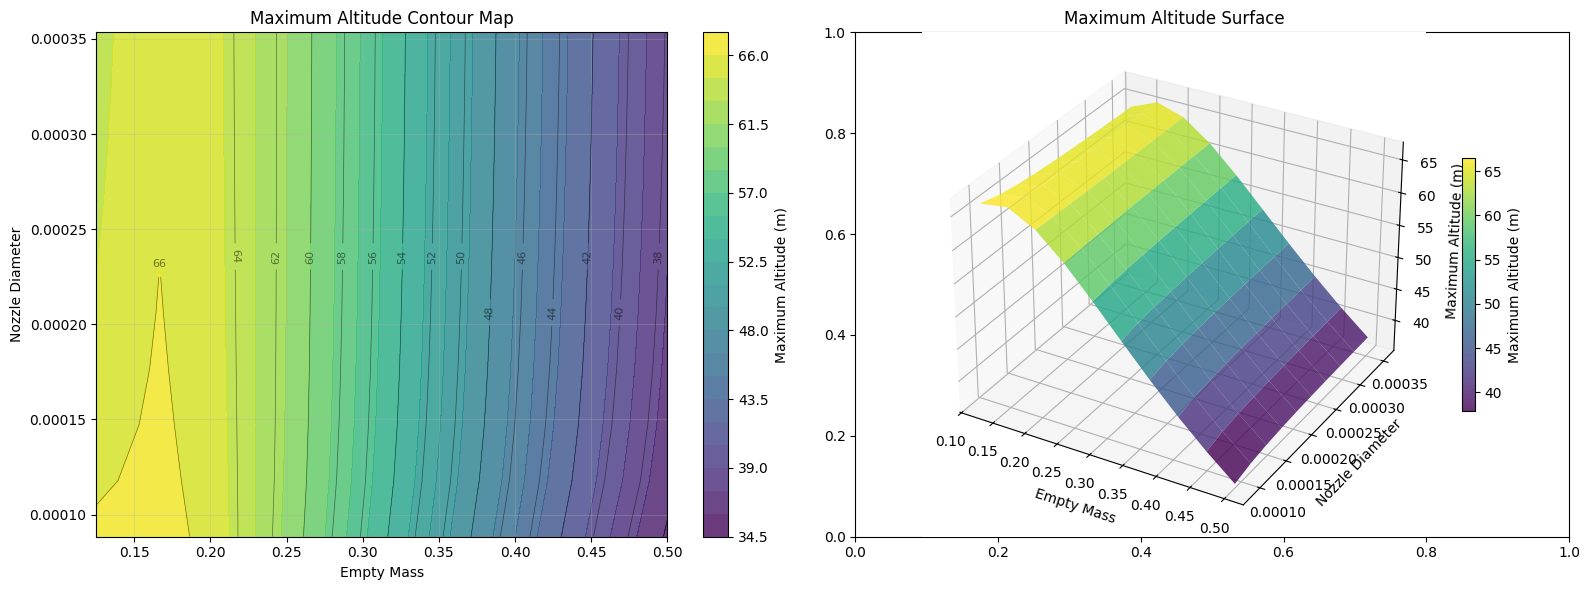

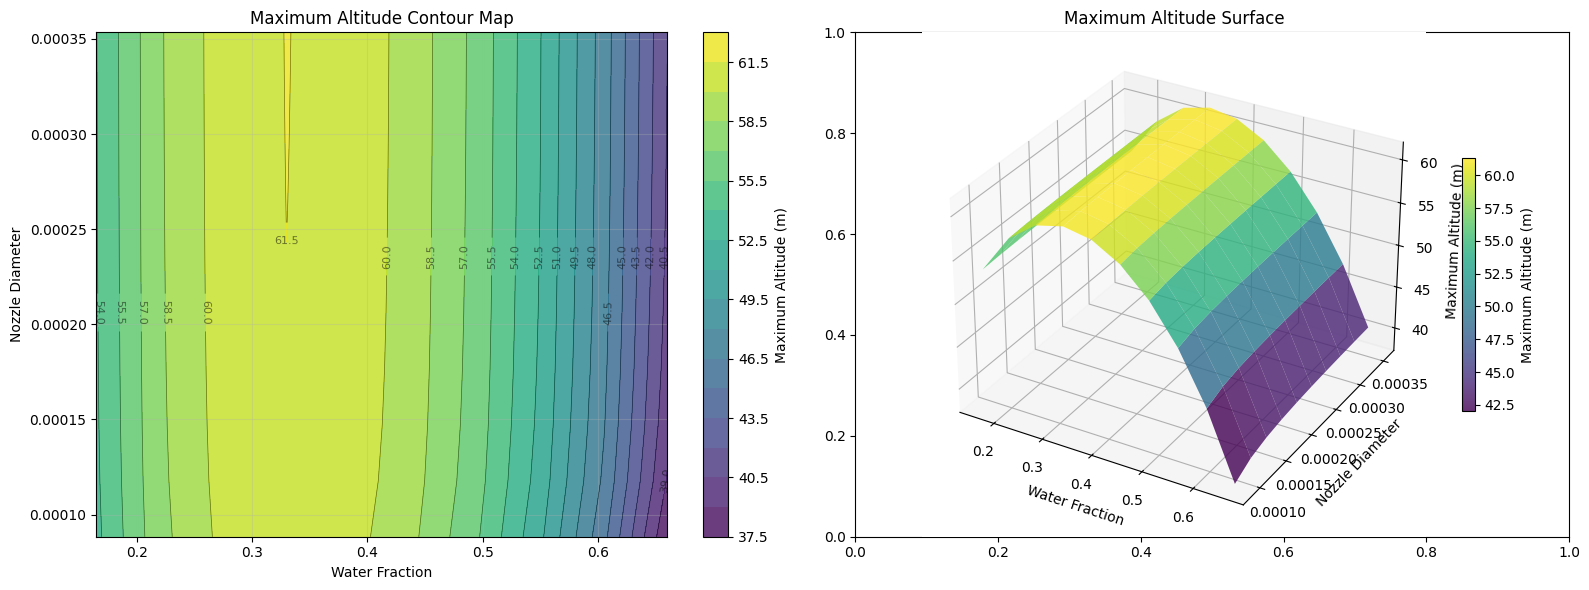

<Figure size 640x480 with 0 Axes>

In [8]:
# Plot the exploration results
explorer.plot_results(results)

# Show the plots
plt.tight_layout()
plt.show()

## Summary

This example demonstrated how to:

1. **Create a base rocket** using the standard configuration
2. **Initialize the ParameterExplorer** and extract base parameters
3. **Define parameters to explore** (empty_mass, water_fraction, nozzle_diameter)
4. **Run parameter exploration** targeting apogee performance
5. **Analyze sensitivity** to understand which parameters have the most impact
6. **Visualize results** with plots showing parameter vs performance relationships

The ParameterExplorer is a powerful tool for optimizing rocket design by identifying which parameters have the greatest influence on performance metrics like maximum height, flight time, or other objectives.

## Next Steps

Try experimenting with:
- Different target metrics (flight_time, max_velocity, etc.)
- Additional parameters to explore
- Different rocket configurations
- Custom parameter ranges and sampling strategies